<a href="https://colab.research.google.com/github/Pretty-Nandhu/Ediglobe_DS_Intern/blob/main/Nandhu_Ediglobe_Major_Project(House_Price_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Predicting Housing Prices Using Linear Regression

#2. Data Collection and Exploration

In [ ]:
import pandas as pd
data_path = '/content/HousingData.csv'
data = pd.read_csv(data_path)

data_head = data.head()
data_description = data.describe()
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


#3. Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
missing_values = data.isnull().sum()

data_filled = data.fillna(data.mean())

scaler = StandardScaler()
features = data_filled.drop('MEDV', axis=1)
scaled_features = scaler.fit_transform(features)

scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data['MEDV'] = data_filled['MEDV']

missing_values, scaled_data.head()

(CRIM       20
 ZN         20
 INDUS      20
 CHAS       20
 NOX         0
 RM          0
 AGE        20
 DIS         0
 RAD         0
 TAX         0
 PTRATIO     0
 B           0
 LSTAT      20
 MEDV        0
 dtype: int64,
        CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
 0 -0.422328  0.296443 -1.311010 -0.279851 -0.144217  0.413672 -0.121059   
 1 -0.419870 -0.489639 -0.599771 -0.279851 -0.740262  0.194274  0.378716   
 2 -0.419872 -0.489639 -0.599771 -0.279851 -0.740262  1.282714 -0.270627   
 3 -0.419277 -0.489639 -1.330435 -0.279851 -0.835284  1.016303 -0.828770   
 4 -0.414981 -0.489639 -1.330435 -0.279851 -0.835284  1.228577 -0.522338   
 
         DIS       RAD       TAX   PTRATIO         B     LSTAT  MEDV  
 0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.104146  24.0  
 1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.510353  21.6  
 2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.239748  34.7  
 3  1.077737 -0.752922 -1.106115 

#4. Data Visualization

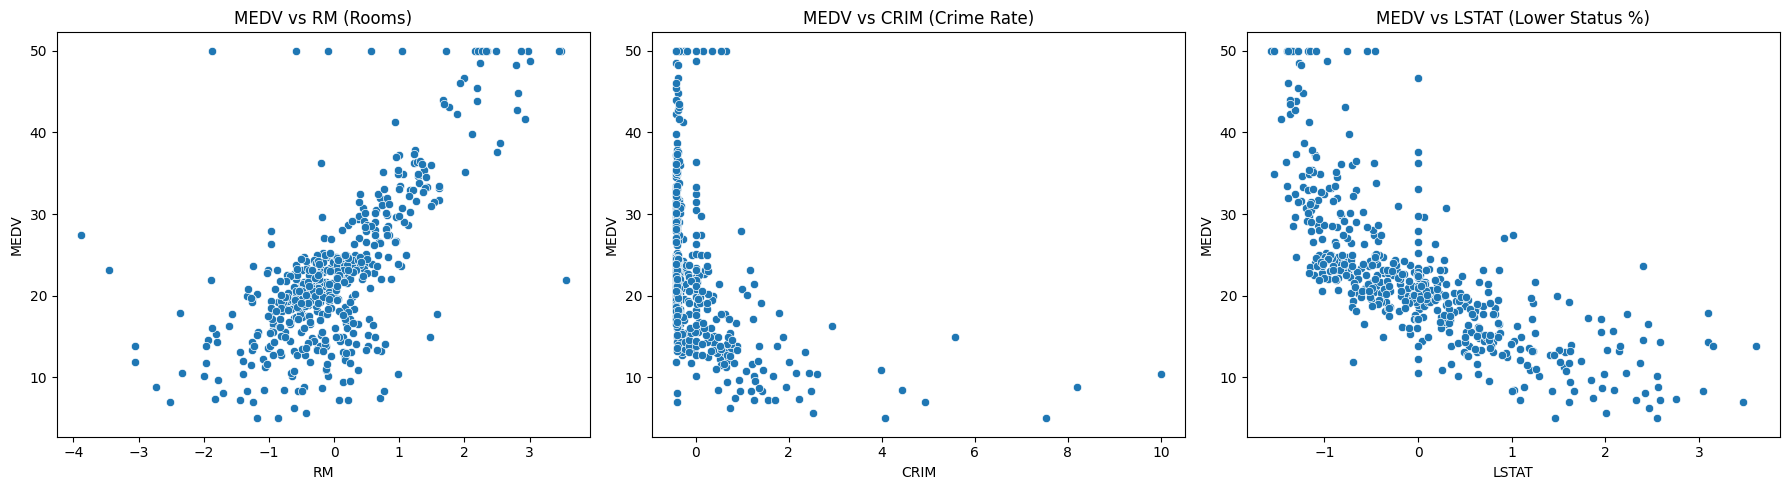

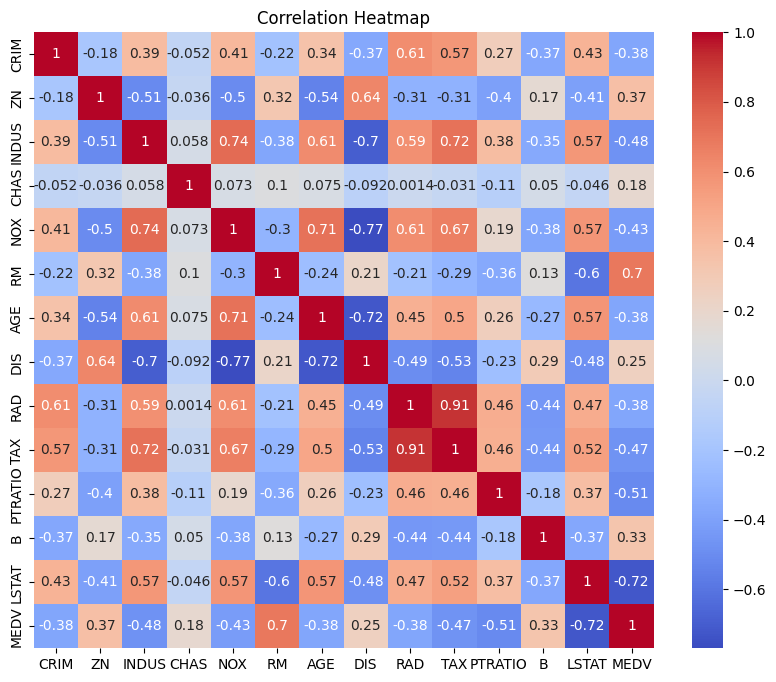

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x=scaled_data['RM'], y=scaled_data['MEDV'], ax=axs[0])
axs[0].set_title('MEDV vs RM (Rooms)')

sns.scatterplot(x=scaled_data['CRIM'], y=scaled_data['MEDV'], ax=axs[1])
axs[1].set_title('MEDV vs CRIM (Crime Rate)')

sns.scatterplot(x=scaled_data['LSTAT'], y=scaled_data['MEDV'], ax=axs[2])
axs[2].set_title('MEDV vs LSTAT (Lower Status %)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(scaled_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#5. Split the Data

In [ ]:
from sklearn.model_selection import train_test_split
X = scaled_data.drop('MEDV', axis=1)
y = scaled_data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((404, 13), (102, 13))

# Train the Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

         Coefficient
CRIM       -0.974449
ZN          0.664411
INDUS      -0.181588
CHAS        0.810122
NOX        -1.854241
RM          3.335823
AGE        -0.535078
DIS        -3.200865
RAD         1.938256
TAX        -1.540697
PTRATIO    -1.916343
B           1.118407
LSTAT      -3.071629


# 6. Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("mae:", mae, "\n")
print("mse:", mse, "\n")
print("r2:", r2, "\n")

mae: 3.1499233573458003 

mse: 25.017672023842863 

r2: 0.6588520195508119 



# 7. Model Interpretation

In [ ]:
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coef_df)

         Coefficient
CRIM       -0.974449
ZN          0.664411
INDUS      -0.181588
CHAS        0.810122
NOX        -1.854241
RM          3.335823
AGE        -0.535078
DIS        -3.200865
RAD         1.938256
TAX        -1.540697
PTRATIO    -1.916343
B           1.118407
LSTAT      -3.071629
